# Airline Satisfaction Survey

### Problem Statement: 

This dataset contains a airline passenger satisfaction survey, task at hand is to determine which factors correlate to a satisfied/neutral, dissatisfied customer.

### Importing Libraries

In [1]:
#Data Processing Libraries
import pandas as pd
import numpy as np
from scipy.stats import norm
from scipy import stats

#Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
%matplotlib inline

#Preprocessing and Model Implimentation Libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_regression
import ppscore as pps
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


### Loading Dataset and Extracting General Information

In [2]:
#We will use pandas feature read_csv to read the csv files we have
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

#### Training Set

In [3]:
#Extracting Information
#Have used the ANSI escape sequences here for bold printing of headings: '\033[1m' +string+ '\033[0m'
print(f'\033[1mSize of training set:\033[0m {df_train.shape[0]} entries\n')
print(f'\033[1mNumber of features columns in training set:\033[0m {df_train.shape[1]-1}\n')
print(f"\033[1mFeatures in training set, also inlcuding the satisfaction column(target) along with their missing values:\n\n\033[0m{df_train.isnull().sum()}" )
print('\033[1m\nCategorical feature discription:\033[0m\n')
df_train.info(show_counts=False)

Size of training set: 103904 entries

Number of features columns in training set: 24

Features in training set, also inlcuding the satisfaction column(target) along with their missing values:

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service             

#### Test Set

In [4]:
print(f"\033[1mSize of test set:\033[0m {df_test.shape[0]} entries\n")
print(f"\033[1mMissing values in test set:\033[0m\n\n{df_test.isnull().sum()}")

Size of test set: 25976 entries

Missing values in test set:

Unnamed: 0                            0
id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in M

### Dataset descriptions

#### Training Set

In [5]:
df_train.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [6]:
df_train.describe(include='object')

,Gender,Customer Type,Type of Travel,Class,satisfaction
count,103904,103904,103904,103904,103904
unique,2,2,2,3,2
top,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,52727,84923,71655,49665,58879


In [7]:
df_train.head(3)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied


#### Test Set

In [8]:
df_test.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.00000,25893.000000
mean,12987.500000,65005.657992,39.620958,1193.788459,2.724746,3.046812,2.756775,2.977094,3.215353,3.261665,3.449222,3.357753,3.385664,3.350169,3.633238,3.314175,3.649253,3.286226,14.30609,14.740857
std,7498.769632,37611.526647,15.135685,998.683999,1.335384,1.533371,1.412951,1.282133,1.331506,1.355536,1.320090,1.338299,1.282088,1.318862,1.176525,1.269332,1.180681,1.319330,37.42316,37.517539
min,0.000000,17.000000,7.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000
25%,6493.750000,32170.500000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.00000,0.000000
50%,12987.500000,65319.500000,40.000000,849.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.00000,0.000000
75%,19481.250000,97584.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.00000,13.000000
max,25975.000000,129877.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1128.00000,1115.000000


In [9]:
df_test.describe(include='object')

,Gender,Customer Type,Type of Travel,Class,satisfaction
count,25976,25976,25976,25976,25976
unique,2,2,2,3,2
top,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,13172,21177,18038,12495,14573


In [10]:
df_test.head(3)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied


##### Categorical Features Unique Values

In [11]:
df_train.satisfaction.value_counts()

neutral or dissatisfied    58879
satisfied                  45025
Name: satisfaction, dtype: int64

In [12]:
df_train.Gender.value_counts()

Female    52727
Male      51177
Name: Gender, dtype: int64

In [13]:
df_train['Customer Type'].value_counts()

Loyal Customer       84923
disloyal Customer    18981
Name: Customer Type, dtype: int64

In [14]:
df_train.Class.value_counts()

Business    49665
Eco         46745
Eco Plus     7494
Name: Class, dtype: int64

In [15]:
df_train['Type of Travel'].value_counts()

Business travel    71655
Personal Travel    32249
Name: Type of Travel, dtype: int64

### Observations:
1. <span style='color:Green'>Training set has 103904 entries and test set has 25976 entries, the complete data set has been divided in the percentage 75.8% - Train, 24.8% - Test.</span>
2. <span style='color:Green'>Both the sets have missing values in only 1 feature: 'Arrival Delay in Minutes'. These NaN values could also signify that the flight was not delayed, we will dwelve deep in these missing values later.</span>
3. <span style='color:Green'>Dataset has 4 categorical features and 20 numerical features, target is 'satisfaction' column.</span>
4. <span style='color:Green'>Dependent Column or the target is binary classified, with neutral and dissatisfied ratings grouped under a same category. We will explore other features in the next section.</span>
5. <span style='color:Green'>Test set also has the target feature included, so we can use the training set completely for training without using train_test_split</span>

### Exporatory Data Analysis

We will begin with the cetgorical features and then focus on the continous features. The purpose of doing EDA here is to extract some usefull information about the features and see what features could play a important role in classifying our target.

In particularly with categorical features it is rather important to see which category the feature belongs in: Nominal or Ordinal. Nominal features are features without any order such as Male,Female while Ordinal features as the name signifies have a significant order like Buisness Class,Economy.Both categories reqiure a different type of Encoding. Read more:https://www.kaggle.com/alexisbcook/categorical-variables

Once we have figured out what the features look like and how they are distributed we can then shift to transforming those features if required and further doing feature engineering to get better accuracies on our models later on.

#### Categorical Features

In [16]:
#creating a list for the categorical features, we will also drop satisfaction from this list as it is the target
cat = df_train.drop('satisfaction',axis=1).select_dtypes('object').columns

In [17]:
for i in cat:
    print(i)

Gender
Customer Type
Type of Travel
Class


<span style='color:Green'>An initial observation we can make early is that Gender is a nominal feature while Class is an ordinal feature based on the unique values we had seen in the section above, rest we are left with Customer_Type and Type_of_Travel_to figure out.</span>

1. Customer_type could be either nominal or ordinal as an airline might have a loyal customer program which in turn is better treatment leading to a better satisfaction rating or they could be treating their customers equally leading to no order in the category.
2. Type_of_travel also is similar where a person going on a personal holiday,family gathering will be more happy,joyous then a person travelling on a buisness travel which could effect his satisfaction rating. Similarly a frequent flier would have no such effect on him by the type of travel.

#### Count Plots 

*Training Set*

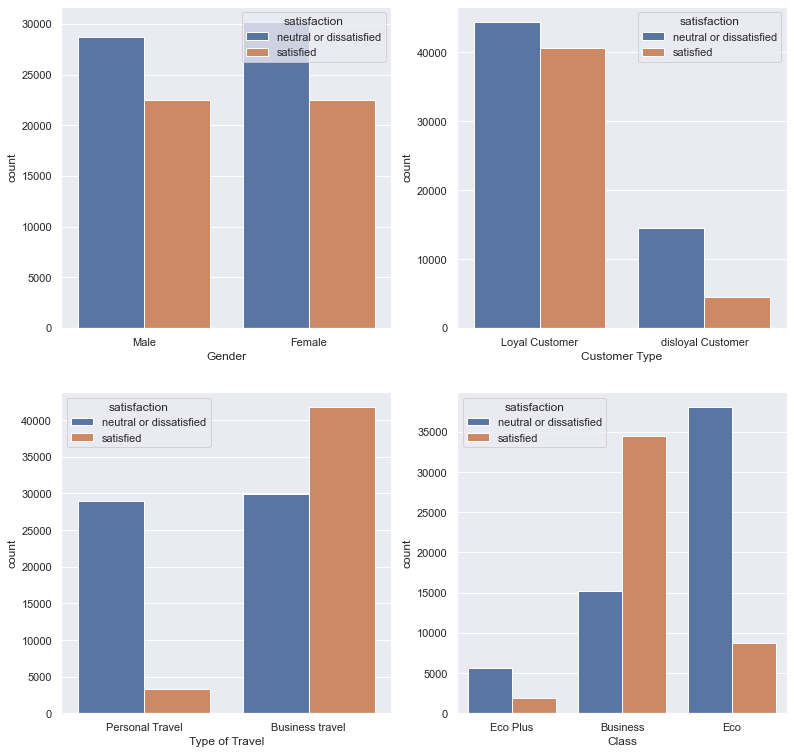

In [18]:
fig,ax = plt.subplots(ncols=2,nrows=2,figsize=(13,13))
for i,f in enumerate (cat,1):
    plt.subplot(2,2,i)
    sns.countplot(x=f,data=df_train,hue='satisfaction')
plt.show()

*Test Set*

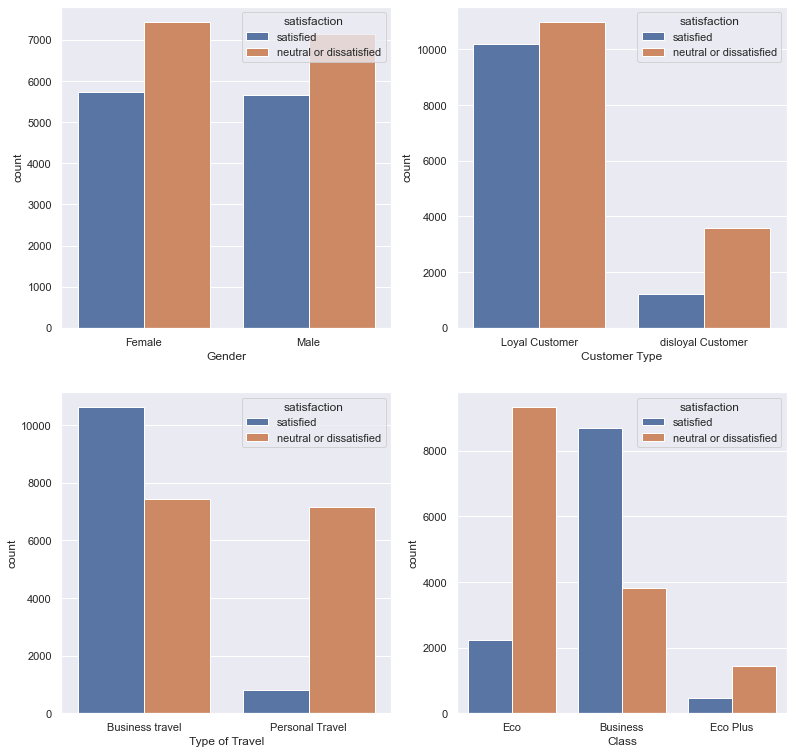

In [19]:
fig,ax = plt.subplots(ncols=2,nrows=2,figsize=(13,13))
for i,f in enumerate (cat,1):
    plt.subplot(2,2,i)
    sns.countplot(x=f,data=df_test,hue='satisfaction')
plt.show()

#### Categorical data grouped with target/satisfaction, representing the count plot relations in numbers

In [20]:
df_train.groupby(['Customer Type','satisfaction']).size()

Customer Type      satisfaction           
Loyal Customer     neutral or dissatisfied    44390
                   satisfied                  40533
disloyal Customer  neutral or dissatisfied    14489
                   satisfied                   4492
dtype: int64

In [21]:
df_train.groupby(['Class','satisfaction']).size()

Class     satisfaction           
Business  neutral or dissatisfied    15185
          satisfied                  34480
Eco       neutral or dissatisfied    38044
          satisfied                   8701
Eco Plus  neutral or dissatisfied     5650
          satisfied                   1844
dtype: int64

In [22]:
df_train.groupby(['Type of Travel','satisfaction']).size()

Type of Travel   satisfaction           
Business travel  neutral or dissatisfied    29909
                 satisfied                  41746
Personal Travel  neutral or dissatisfied    28970
                 satisfied                   3279
dtype: int64

In [23]:
df_train.groupby(['Gender','satisfaction']).size()

Gender  satisfaction           
Female  neutral or dissatisfied    30193
        satisfied                  22534
Male    neutral or dissatisfied    28686
        satisfied                  22491
dtype: int64

#### Observations:
1. <span style='color:Green'>Gender distribution is fairly equal, with slighlty more females travelling.</span>
2. <span style='color:Green'>Loyal Customers highly outnumber disloyal customers.</span>
3. <span style='color:Green'>Almost half the people travelling are on buiness/work related travel.</span>
4. <span style='color:Green'>Eco and Buisness Class have the same number of passengers with only Eco Plus having few passengers in this Class.</span>
1. <span style='color:Green'>Our observations of Gender being nominal and Class being Ordinal are satisfied here. Gender categories are equally distributed on the satisfaction rating while the Buisness Class seems to have a very high satisfied rating, more than half the other ratings.On the other hand are not as satisfied as the buisness class with Eco being the most dissatisifed/neutral. This feature seems to have a big correlation with satisfaction.</span>
2. <span style='color:Green'>Type of travel is failry simlar to Class as the Buisness Travel has a high number of satisfied ratings while personal travel has very few satisfied ratings. I think this is also related to Class, Buisness travels are generally booked by the business itself and mostly the companies/buisness would book a Business Class ticket, on the other hand most people on personal travel would book a Eco or Eco plus ticket unless they are failry rich. People on buisness travel also dont pay for the tickets while personally travelling people do which could also be a factor. We can further group data to see if our observations are correct.</span>
3. <span style='color:Green'>Customer type is still not clear as even though loyal customers are failry distributed it's the disloyal customers which are concentrated towards the dissatisfied/neutral rating. We will treat it as nominal for now.</span>

##### Grouping Type of Travel,Class and Satisfaction to see if observation number 6 holds any value

In [24]:
df_train.groupby(['Type of Travel','Class','satisfaction']).size()

Type of Travel   Class     satisfaction           
Business travel  Business  neutral or dissatisfied    13292
                           satisfied                  34216
                 Eco       neutral or dissatisfied    14257
                           satisfied                   6000
                 Eco Plus  neutral or dissatisfied     2360
                           satisfied                   1530
Personal Travel  Business  neutral or dissatisfied     1893
                           satisfied                    264
                 Eco       neutral or dissatisfied    23787
                           satisfied                   2701
                 Eco Plus  neutral or dissatisfied     3290
                           satisfied                    314
dtype: int64

<span style='color:Green'>The table above shows some relations between Type of travel and Class, people on buisness travel flying buisness class are majorly satisfied while people on personal travle flying buisness are quite the opposite, this could be due to the cost involved in booking a high cost buisness class ticket for personal travel whereas the same costs would be covered by the buisness/company on buisness travel. Even people on buisness travel flying economy are dont have as much as a big neutral,dissatisfied/satisifed ratio to people on personal travel flying the same class.</span>

<span style='color:Green'>**It is clear that the major contributors of the satisfied category are the buiness travel and buisness class people. The airline could also imporve on its ratings by focusing its efforts on Eco class travels.**</span>

New feature groups can be created here which incorporates these relationships.

#### Categorical Features present in the Numerical Features
If you have a look at the descriptive analysis of the numerical features again you can observe that not all of them are continous, features like Wifi-service,Food and Drink,Seat comfort are actually ratings from 0 to 5 and will come under categorical features

In [25]:
num = df_train.drop(['satisfaction','id','Unnamed: 0'],axis=1).select_dtypes('int64').columns

In [26]:
df_train[num].describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000
mean,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618
std,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000
50%,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000
75%,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000


In [27]:
#we can create a new numerical_catgeorical list for these, we will not be inclduing them in the cat list as these
#would not require any encoding
num_cat = df_train.drop(['satisfaction','id','Unnamed: 0','Departure Delay in Minutes','Age','Flight Distance'],axis=1).select_dtypes('int64').columns

#### Training Set Num_Cat Histogram

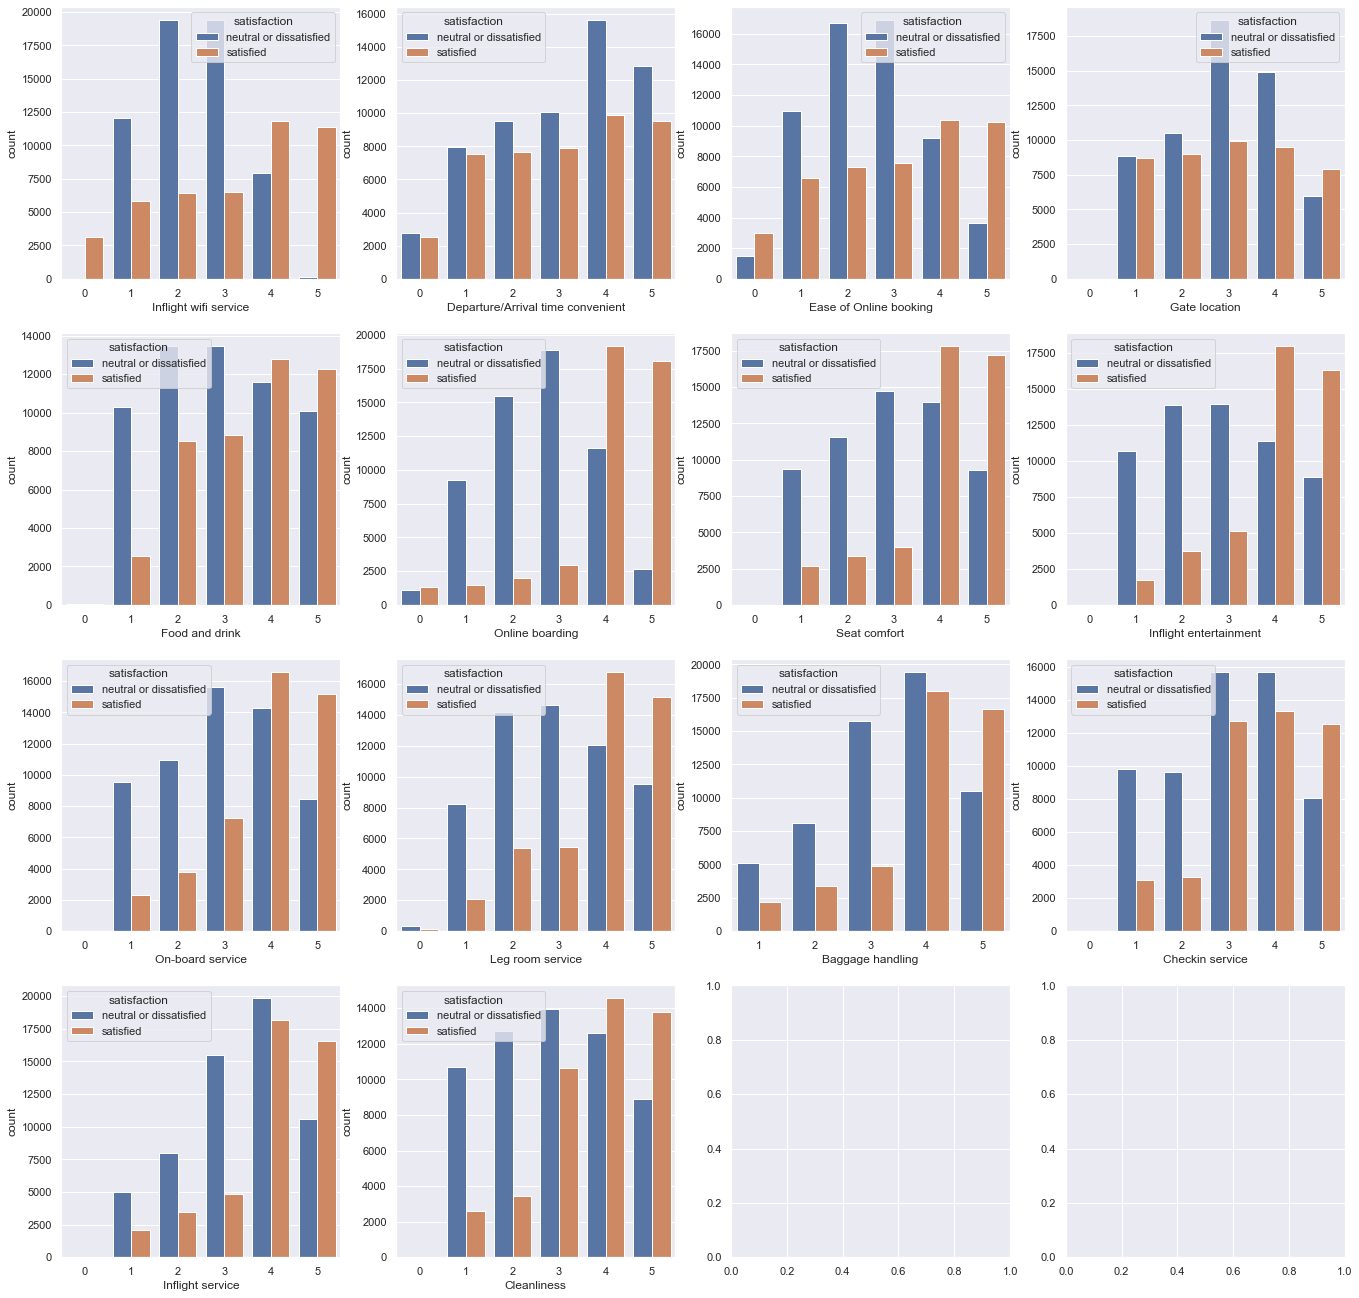

In [28]:
fig,ax = plt.subplots(ncols=4,nrows=4,figsize=(23,23))
for i,f in enumerate (num_cat,1):
    plt.subplot(4,4,i)
    sns.countplot(x=f,data=df_train,hue='satisfaction')
plt.show()

#### TestSet Num_Cat Histogram

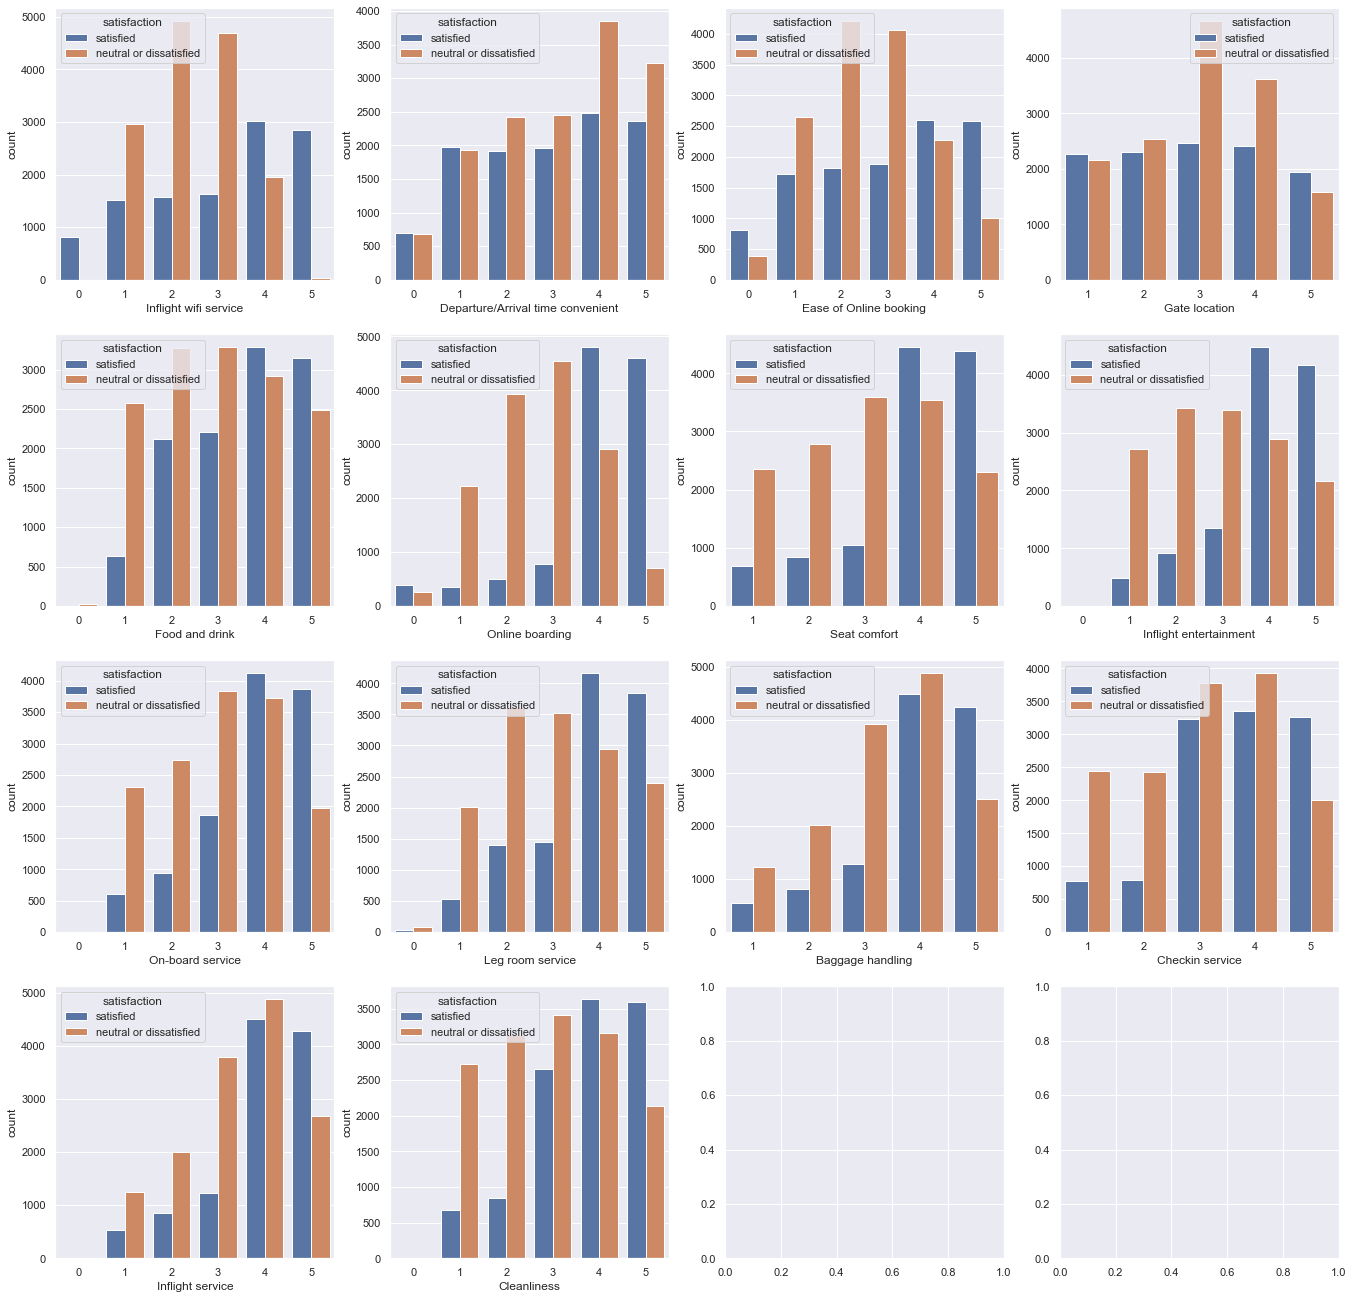

In [29]:
fig,ax = plt.subplots(ncols=4,nrows=4,figsize=(23,23))
for i,f in enumerate (num_cat,1):
    plt.subplot(4,4,i)
    sns.countplot(x=f,data=df_test,hue='satisfaction')
plt.show()

#### Observations:
1. <span style='color:Green'>Features like online boarding, seat comfort, inflight entertainment, onboard service, leg room, baggage handling, inflight service, cleanliness have satisfied customers when the features themsleves have a high rating of 4,5.</span>
2. <span style='color:Green'>Check in service and food/drink ratings in the range 3-5 have more satisfied customers.</span>
3. <span style='color:Green'>Features like wifi, dep/arr time convenient, gate location, online booking with high ratings do no correlate to a satisfied customer.</span>
4. <span style='color:Green'>A rating of 5 on Wifi services highly correlate to a satisfied rating. Almost all the people who have rated Wifi as 5 are satisfied overall.</span>
4. These num_cat features are already encoded.

#### Continous Features

In [30]:
num = ['Age','Flight Distance','Departure Delay in Minutes','Arrival Delay in Minutes']

#### Distribution plots

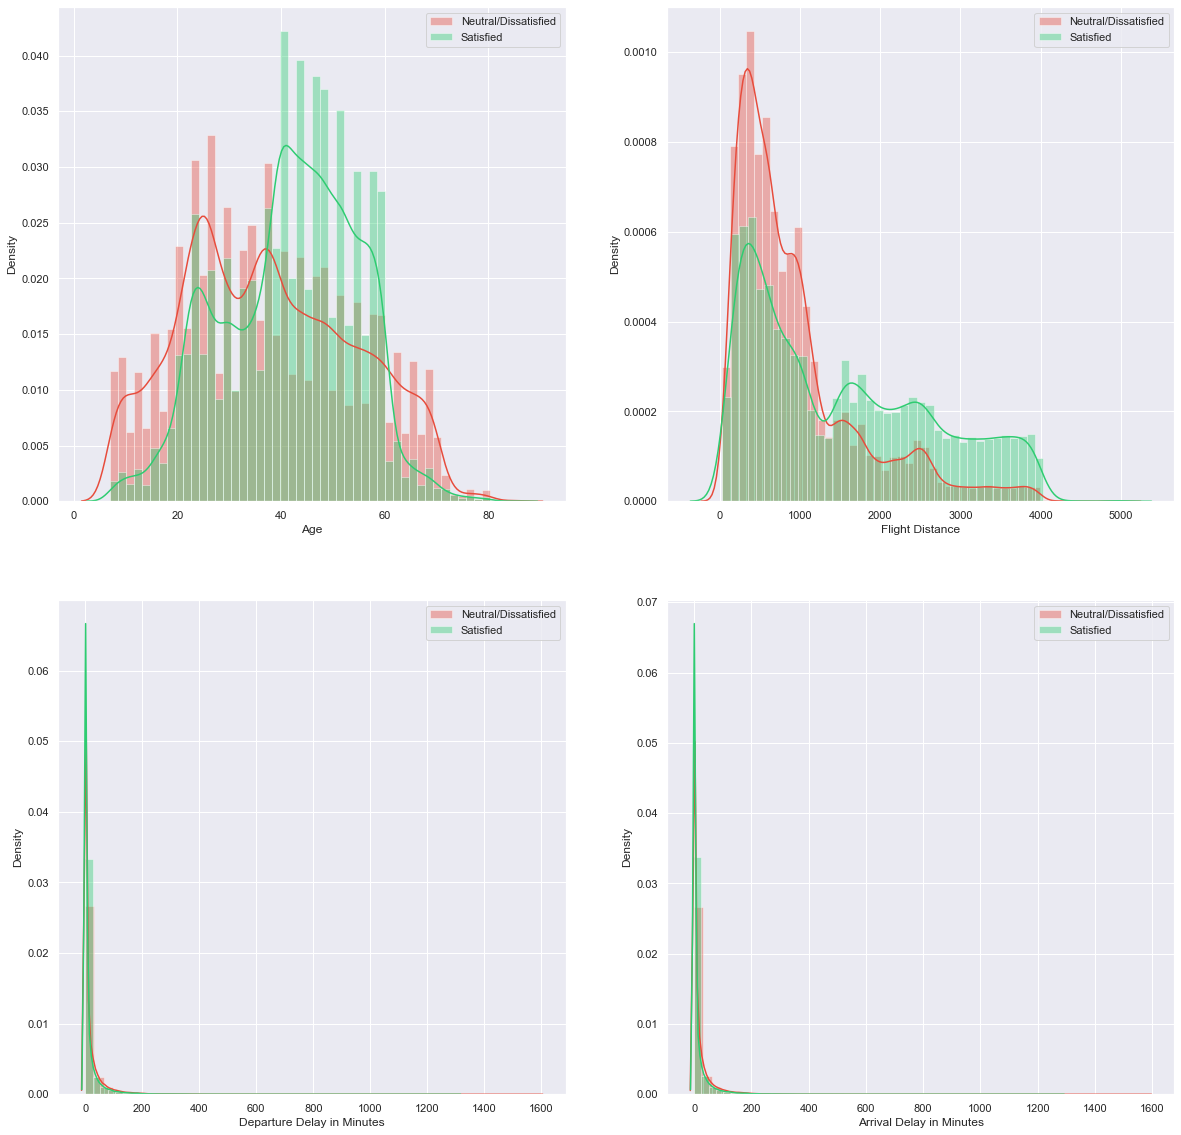

In [31]:
#Train set
satisfied = df_train['satisfaction'] == 'satisfied'
fig,axs = plt.subplots(ncols=2,nrows=2,figsize=(20,20))

for i,feature in enumerate(num,1):
    plt.subplot(2,2,i)
    sns.distplot(df_train[~satisfied][feature],label='Neutral/Dissatisfied',hist=True,color='#e74c3c')
    sns.distplot(df_train[satisfied][feature],label='Satisfied',hist=True,color='#2ecc71')
    plt.legend()

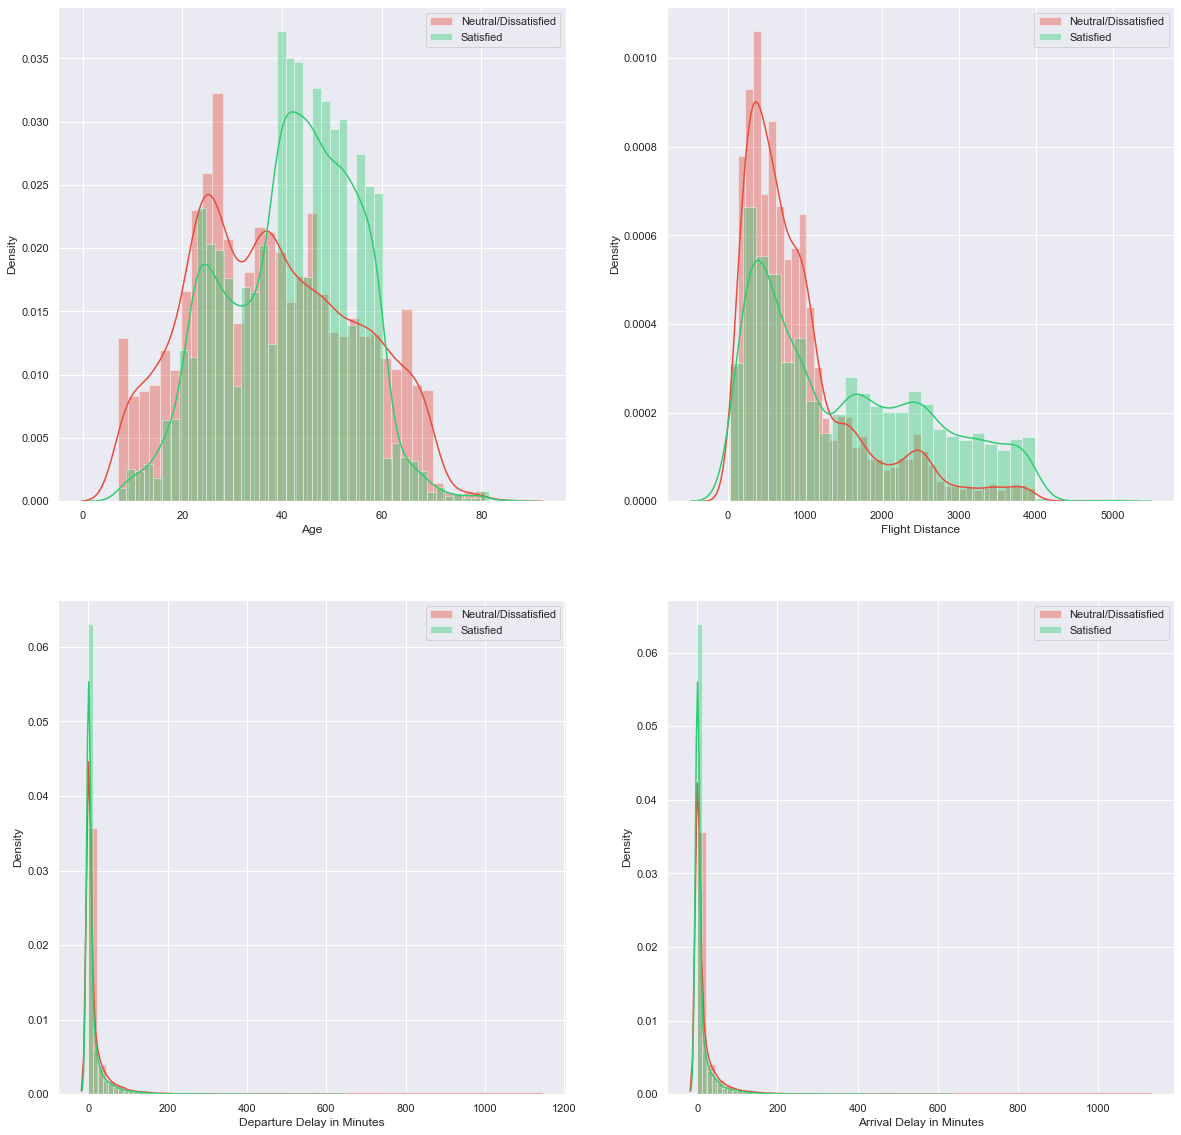

In [32]:
#Test set
satisfied = df_test['satisfaction'] == 'satisfied'
fig,axs = plt.subplots(ncols=2,nrows=2,figsize=(20,20))

for i,feature in enumerate(num,1):
    plt.subplot(2,2,i)
    sns.distplot(df_test[~satisfied][feature],label='Neutral/Dissatisfied',hist=True,color='#e74c3c')
    sns.distplot(df_test[satisfied][feature],label='Satisfied',hist=True,color='#2ecc71')
    plt.legend()

In [33]:
print('Arrival Delay in Minutes')
print("Skewness: %f" %df_train['Arrival Delay in Minutes'].skew())
print("Kurtosis: %f" %df_train['Arrival Delay in Minutes'].kurt())

Arrival Delay in Minutes
Skewness: 6.596637
Kurtosis: 94.537006


In [34]:
print('Departure Delay in Minutes')
print("Skewness: %f" %df_train['Departure Delay in Minutes'].skew())
print("Kurtosis: %f" %df_train['Departure Delay in Minutes'].kurt())

Departure Delay in Minutes
Skewness: 6.733980
Kurtosis: 100.267006


#### Observations:
1. <span style='color:Green'>Delay features are highly skewed and leptokurtic(kurtosis>3).</span>
2. <span style='color:Green'>Age bracket of 40-60 is more satisfied.</span>
3. <span style='color:Green'>Flight Distance density shows that a lot of neautral/dissatisfied ratings are under 1500 distance, this could be because of the fact that most flights line under this distance.</span>
4. <span style='color:Green'>Flights with distance greater than 2000 have a better satisfaction rating, this could be due to the reason that longer distance flights have greater features like comfortable seating, food and other services offered. We can compare this feature with the services offered in num_cat and see if any relationships are present.</span>

##### Comparing rating features with flight distances to see if any relations are present , using striplots

In [35]:
df_train.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [36]:
quality_features=['Class','Food and drink','Seat comfort','Inflight entertainment','On-board service','Leg room service'
                  ,'Cleanliness','Inflight service']

##### Flight Distance

<AxesSubplot:xlabel='Inflight entertainment', ylabel='Flight Distance'>

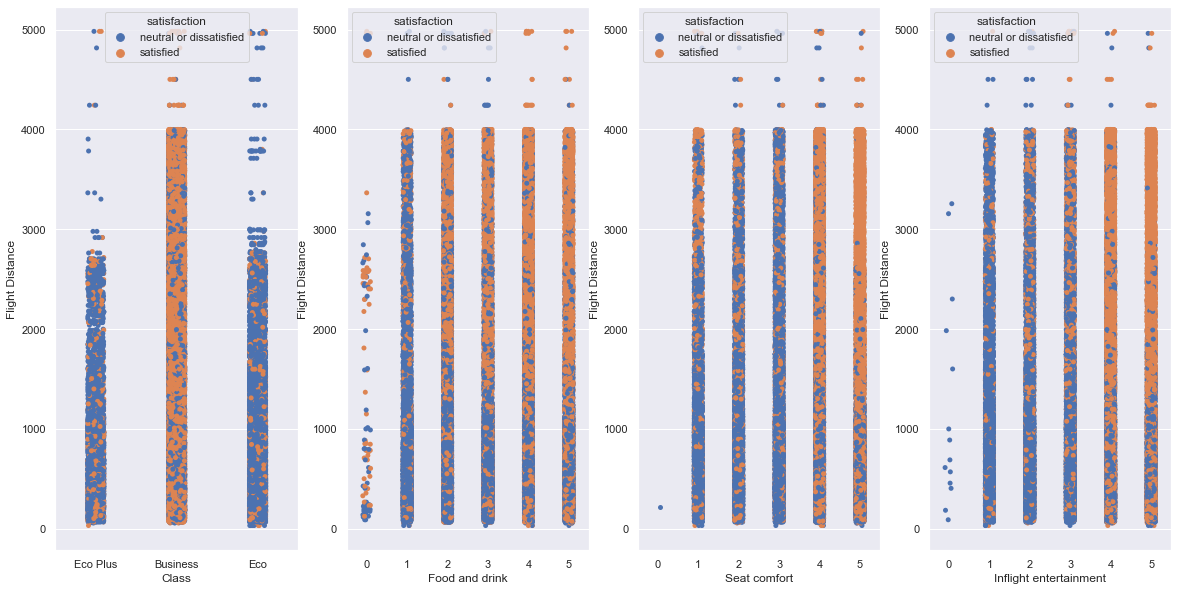

In [37]:
fig,axs = plt.subplots(1,4,figsize=(20,10))

sns.stripplot(x=quality_features[0],y='Flight Distance',data=df_train,ax=axs[0],hue='satisfaction')
sns.stripplot(x=quality_features[1],y='Flight Distance',data=df_train,ax=axs[1],hue='satisfaction')
sns.stripplot(x=quality_features[2],y='Flight Distance',data=df_train,ax=axs[2],hue='satisfaction')
sns.stripplot(x=quality_features[3],y='Flight Distance',data=df_train,ax=axs[3],hue='satisfaction')

<AxesSubplot:xlabel='Inflight service', ylabel='Flight Distance'>

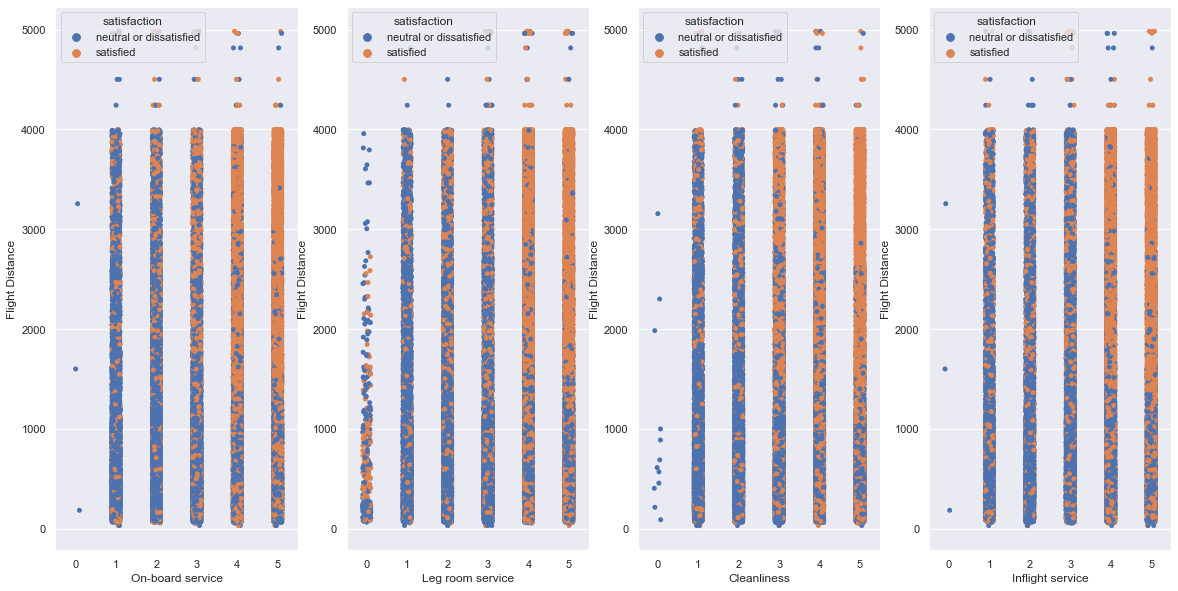

In [38]:
fig,axs = plt.subplots(1,4,figsize=(20,10))

sns.stripplot(x=quality_features[4],y='Flight Distance',data=df_train,ax=axs[0],hue='satisfaction')
sns.stripplot(x=quality_features[5],y='Flight Distance',data=df_train,ax=axs[1],hue='satisfaction')
sns.stripplot(x=quality_features[6],y='Flight Distance',data=df_train,ax=axs[2],hue='satisfaction')
sns.stripplot(x=quality_features[7],y='Flight Distance',data=df_train,ax=axs[3],hue='satisfaction')

##### Age

<AxesSubplot:xlabel='Leg room service', ylabel='Age'>

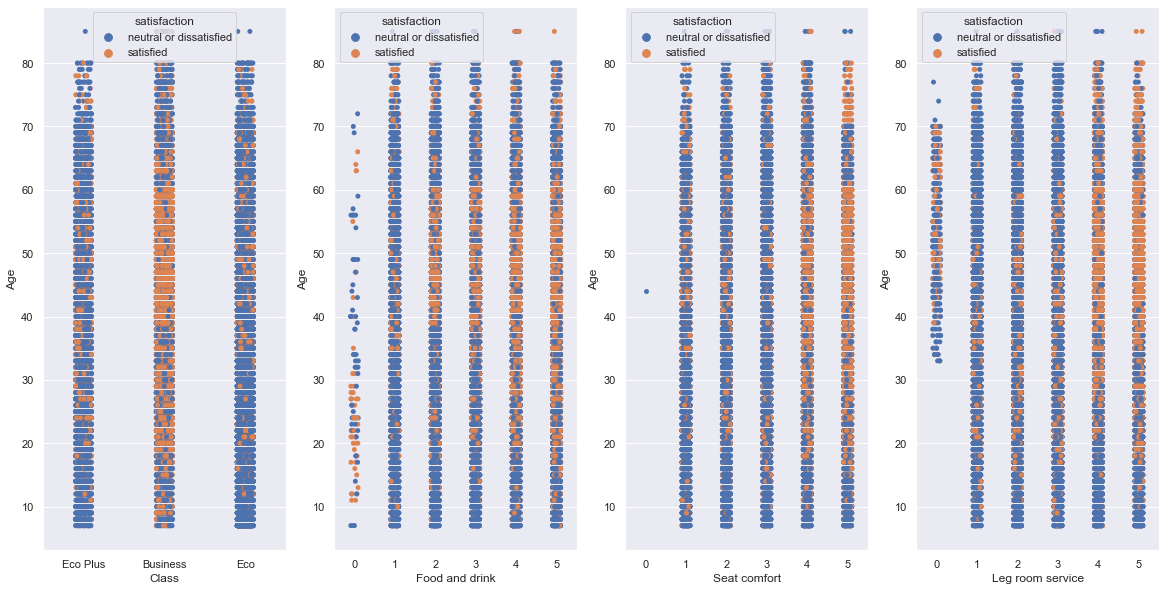

In [39]:
fig,axs = plt.subplots(1,4,figsize=(20,10))

sns.stripplot(x=quality_features[0],y='Age',data=df_train,ax=axs[0],hue='satisfaction')
sns.stripplot(x=quality_features[1],y='Age',data=df_train,ax=axs[1],hue='satisfaction')
sns.stripplot(x=quality_features[2],y='Age',data=df_train,ax=axs[2],hue='satisfaction')
sns.stripplot(x=quality_features[5],y='Age',data=df_train,ax=axs[3],hue='satisfaction')

#### Observations: 
1. <span style='color:Green'>The reason for longer flight distances having more satisfied people was people travelling buisness class on longer distances.</span>
2. <span style='color:Green'>The other services offered features are fairly distributed on the flight disatance axis,the observation of better services on a lon distance flight was incorrect.</span>
3. <span style='color:Green'>Even the Age feature stripplots show that the bracket of 40-60 which had more satisfaction ratings were majorly travelling in buisness class.</span>

#### Correlation Heatmap Training Set

<AxesSubplot:>

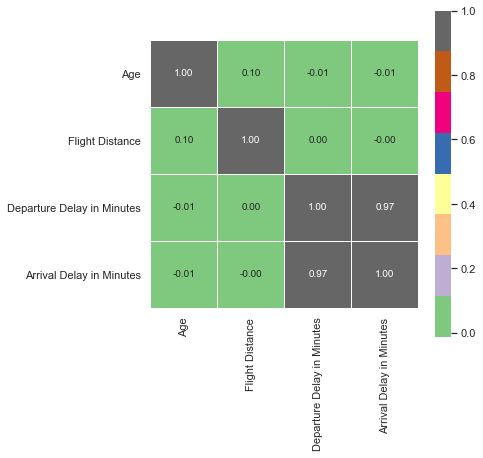

In [40]:
plt.figure(figsize=(6,6))
sns.heatmap(df_train[num].corr(),annot=True,fmt=".2f",linewidth=1.0,square=True,cmap='Accent')

In [41]:
#As most of the features are categorical in nature(numerical + object). There are only 4 contnious features present.

##### An alternative to using heatmap which only gives continous to contnious relations we can use a different library called dython which has a speical  association class which will handle all the interactions (contnious-categorical,categorical-categorical and cont-cont ) for us. 

I have attached a link here where one can read more about the class and how it handles the different comparisons like theil's uncertainity coefficent for cat-cat and correlation ratio for cat-cont.These parameters can be tuned as well. Read more here: https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9 

In [42]:
from dython.nominal import associations

#### Associations Heatmap Training Set

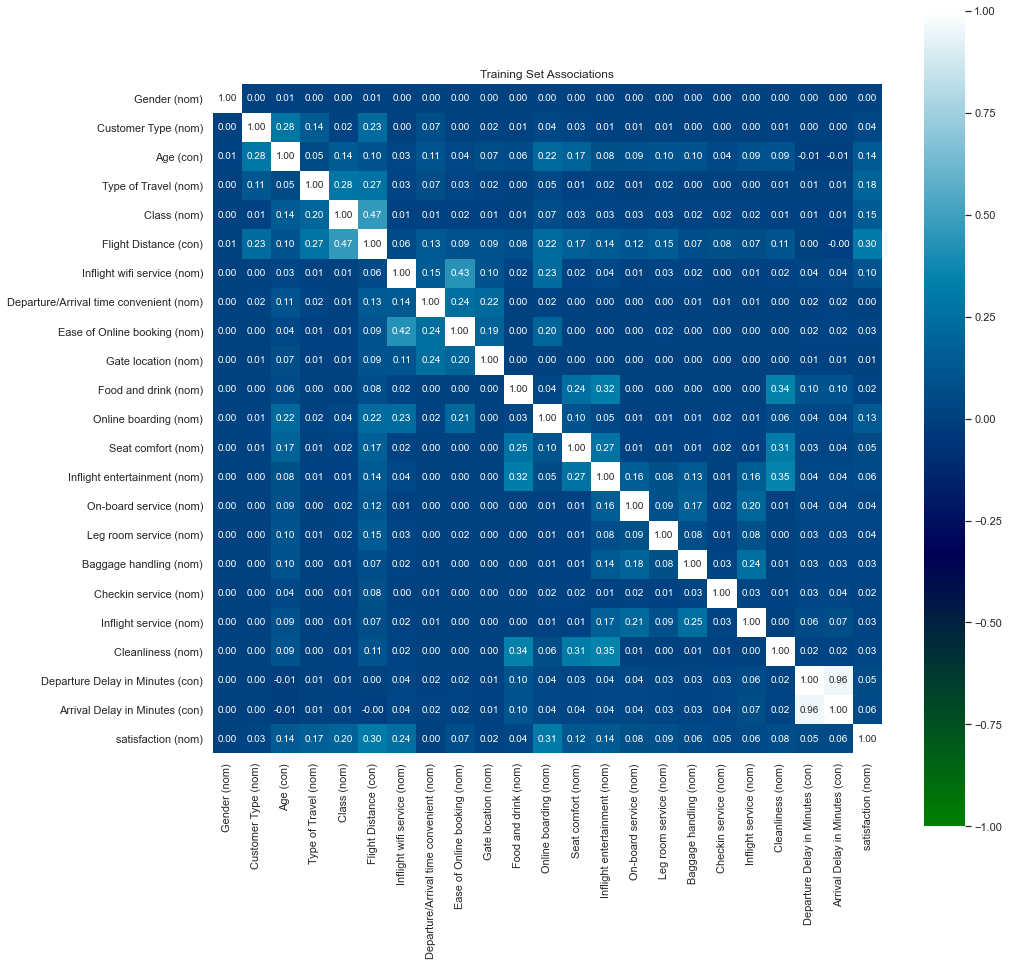

<AxesSubplot:title={'center':'Training Set Associations'}>

In [43]:
#By default cat-cat comaprisons are done using Cramer'V, we will use Theil's Uncertainity coefficent here. 
#The function itself gives a table of all the correlation/strength of association, we dont need that,
#hence we have used ['ax'] to just get the plot
#Note: Theil's U is not symmetrical like Cramer V , it is sensitive to swapping x and y. Read more in link above
associations(df_train.drop(['id','Unnamed: 0'],axis=1),numerical_columns=num,figsize=(15,15),nom_nom_assoc='theil',
             title='Training Set Associations',mark_columns=True,cmap='ocean')['ax']

#### Associations Heatmap Test Set

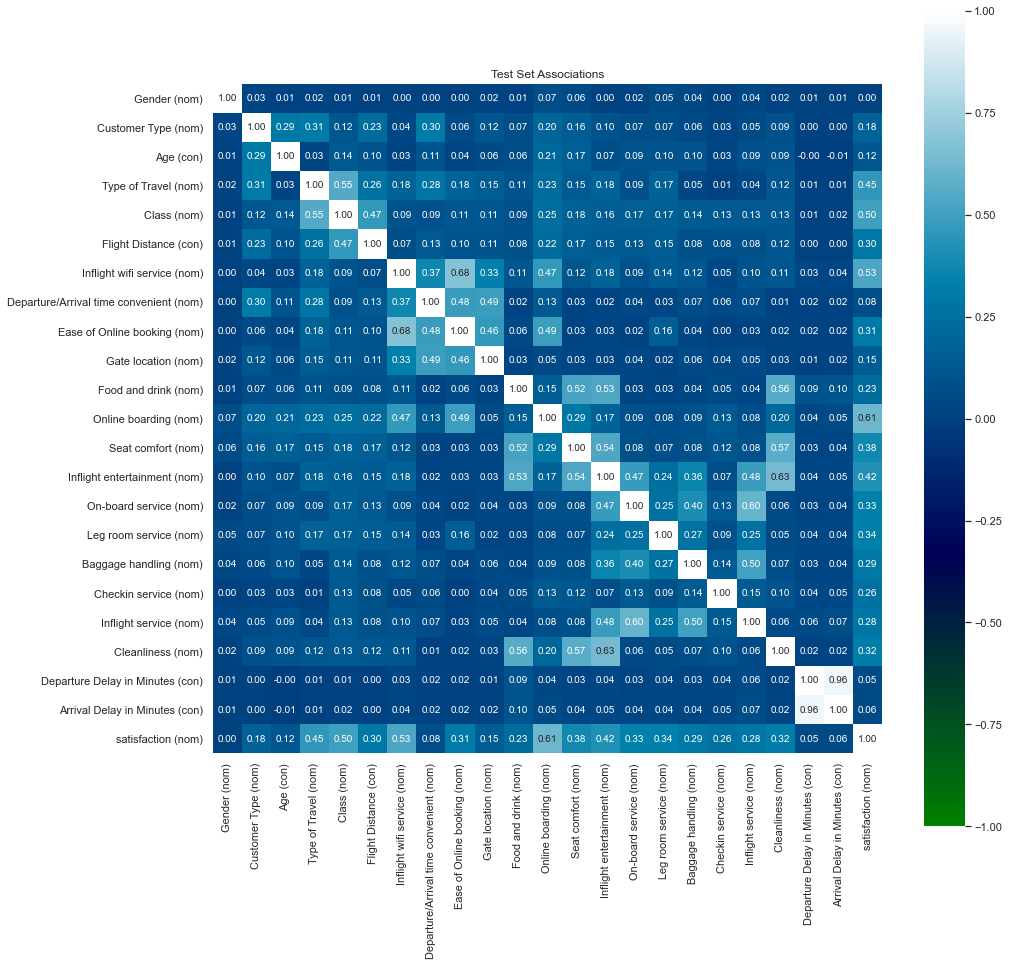

<AxesSubplot:title={'center':'Test Set Associations'}>

In [44]:
#For the test set we can use Cramer's V and see how that changes the correlation/strength of association
#We don't need to specify Cramer's V selction as it is the default method used
associations(df_test.drop(['id','Unnamed: 0'],axis=1),numerical_columns=num,figsize=(15,15),
             title='Test Set Associations',mark_columns=True,cmap='ocean')['ax']

#### Observations:
1. <span style='color:Green'>Firstly, you can see a major difference when using Cramer's V instead of Theil's U. The numbers have gone up, could be explained due to the fact that Theils method only looks at how one feature will be associated to the other and not the other way round like Cramer's method were a association number tells the the association of x to y and y to x. For example the class feature has less association in determining satisfaction than satisfaction determining class.</span>
2. <span style='color:Green'> I did had a look at the training set's association heatmap using cramer as well to confirm that these differences were not due to the fact that the datasets for both the heatmaps are different but the numbers were failry similar so we can rule that out.</span>
3. <span style='color:Green'>Features with highest association using Cramer's V: Online Boarding, Wifi, Class, Type of travel, Inflight Entertainment, Flight Distance, seat comfort, on board service, leg room</span>
4. <span style='color:Green'>Features with highest association using Theil's U: Flight Distance, type of travel, class,age,wifi-service,online boarding.</span>
5. <span style='color:Green'>Cleanliness has high associations with flight services.</span>
6. <span style='color:Green'>Departure Delay and Arrival Delay are highly correlated to each other, because a delay in eparture is most likey to cause the same time delay in arrival.</span>
7. <span style='color:Green'>Ease of online booking is also correlated to inflight wifi services for some reason.</span>
8. <span style='color:Green'>Class and Flight distance are also associated.</span>

#### NOTE : Mutual Information and PPScore calculation are not necessary here as we have already gained as much info we can and these two methods will not give us something new, you can skip these if you want. I have still carried them out to see if our earlier observations hold up on these.

#### Mutual Information

In [45]:
#Mutual information will give us relationships between targets and the features other than linear relationships as well
#The association heatmap was a good representation which led us to some conclusions, we can confirm those with this

In [46]:
X = df_train.drop(['id','Unnamed: 0','Arrival Delay in Minutes','Departure Delay in Minutes'],axis=1).copy()
#We have dropped Delay features here as we would have to treat them for missing values befor this and they also have not contributed to any association with satisfaction uptill now

In [47]:
"""The scikit-learn algorithm for MI treats discrete features differently from continuous features. Consequently, you need to tell it which are which. As a rule of thumb, anything that must have a float dtype is not discrete. Categoricals (object or categorial dtype) can be treated as discrete by giving them a label encoding. """

'The scikit-learn algorithm for MI treats discrete features differently from continuous features. Consequently, you need to tell it which are which. As a rule of thumb, anything that must have a float dtype is not discrete. Categoricals (object or categorial dtype) can be treated as discrete by giving them a label encoding. '

In [48]:
#Label Encoding for categoricals
#We will have to include satisfaction here for the encoding, we can later pop it out to serve as our target

cat1 = ['Gender','Customer Type','Type of Travel','Class','satisfaction']

le = LabelEncoder()
for feature in cat1:
    X[feature] = le.fit_transform(X[feature])
    
y= X.pop('satisfaction')

In [49]:
discrete_features = X.dtypes == int #Double check this before implimentation

In [50]:
def mi_scores(X,y,discrete_features):
    mi = mutual_info_regression(X,y,discrete_features=discrete_features)
    mi = pd.Series(mi, name="MI Scores",index = X.columns)
    mi = mi.sort_values(ascending=False)
    return mi

In [51]:
mi = mi_scores(X,y,discrete_features)

Text(0.5, 1.0, 'Mutual Information Scores')

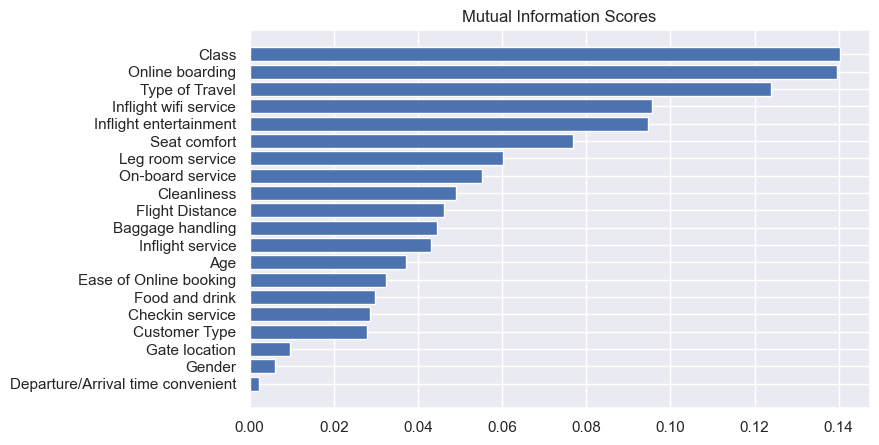

In [52]:
#plotting the mi_scores

plt.figure(dpi=100,figsize=(8,5))
mi=mi.sort_values(ascending=True)
width = np.arange(len(mi))
ticks = list(mi.index)
plt.barh(width,mi)
plt.yticks(width,ticks)
plt.title("Mutual Information Scores")

##### A few features which we had observed earlier to have high association values like class,online boarding , type of travel and wifi are the highest scorers here but keep in mind that these MI scores are not high and rather on the low end

#### PPScore

In [53]:
#Metric to determine predicting power of the features

In [54]:
X = df_train.drop(['id','Unnamed: 0','Arrival Delay in Minutes','Departure Delay in Minutes'],axis=1).copy()
le = LabelEncoder()
for feature in cat1:
    X[feature] = le.fit_transform(X[feature])

#ppscore like mi needs categorical features to be encoded

In [55]:
features= df_train.drop(['id','Unnamed: 0','Arrival Delay in Minutes','Departure Delay in Minutes','satisfaction'],axis=1).columns

for i in features:
    print(f"{i}'s PPScore: {pps.score(X,x=i,y='satisfaction')['ppscore']}' ")

Gender's PPScore: 0' 
Customer Type's PPScore: 0' 
Age's PPScore: 0' 
Type of Travel's PPScore: 0.11891956864885989' 
Class's PPScore: 0.188993478275293' 
Flight Distance's PPScore: 0.031601652781304' 
Inflight wifi service's PPScore: 0.1786223584715122' 
Departure/Arrival time convenient's PPScore: 0' 
Ease of Online booking's PPScore: 0' 
Gate location's PPScore: 0' 
Food and drink's PPScore: 0' 
Online boarding's PPScore: 0.33713203166521843' 
Seat comfort's PPScore: 0.09797320838849477' 
Inflight entertainment's PPScore: 0.11544875214466244' 
On-board service's PPScore: 0.02158825069138215' 
Leg room service's PPScore: 0.017554379417030863' 
Baggage handling's PPScore: 0' 
Checkin service's PPScore: 0' 
Inflight service's PPScore: 0' 
Cleanliness's PPScore: 0.015552985986414747' 


##### Online Boarding has the highest prediction power followed by Class,Wifi, Type of Travel and Inflight Entertainment 

#### Final Observations for EDA: 
1. <span style='color:Green'>As observed earlier Class and Type of Travel have shown good scores/associations with the target. We can try creating a new feature combining both of these to see if we get a better association as these two are also related to each other.</span>
2. <span style='color:Green'>Flight services like Wifi,legspace,seating,etc.. are also contributing to the satisfaction rating.</span>
3. <span style='color:Green'>The delay features are highly skewed and their kutosis is also very high, we can apply transformations to them to bring them closer to a normal distribution. Flight Distance could also use a transformation.</span>

### Missing Values

In [56]:
#The delay in arrival column has 310 missing values out of 103904 values in total in the training set, 83/25976 in test set
print(f"Training Set Missing Values:{df_train['Arrival Delay in Minutes'].isnull().sum()}")
print(f"Test Set Missing Values:{df_test['Arrival Delay in Minutes'].isnull().sum()}")

Training Set Missing Values:310
Test Set Missing Values:83


In [57]:
#We will can replace these missing values with 0.0 as it is the highest occuring value 
#Also it could be that all NaN values are actually flights without any delay signifying a zero
print(f"Mode of Training Set:{df_train['Arrival Delay in Minutes'].mode()[0]}")
print(f"Mode of Test Set:{df_test['Arrival Delay in Minutes'].mode()[0]}")

Mode of Training Set:0.0
Mode of Test Set:0.0


In [58]:
df_train['Arrival Delay in Minutes'] = df_train['Arrival Delay in Minutes'].fillna(df_train['Arrival Delay in Minutes'].mode()[0])
df_test['Arrival Delay in Minutes'] = df_test['Arrival Delay in Minutes'].fillna(df_test['Arrival Delay in Minutes'].mode()[0])

In [59]:
#Checking missing values again
print(f"Training Set Missing Values:{df_train['Arrival Delay in Minutes'].isnull().sum()}")
print(f"Test Set Missing Values:{df_test['Arrival Delay in Minutes'].isnull().sum()}")

Training Set Missing Values:0
Test Set Missing Values:0


### Feature Engineering and Feature Transformations

#### 1: Log Transforming Delay Features
The delay features are highly skewed and kurtosis is also very high, we can apply log transformations to get a normal distribution.

In [60]:
print("Skewness(Arrival Delay in Minutes-Training Set): %f" %df_train['Arrival Delay in Minutes'].skew())
print("Kurtosis(Arrival Delay in Minutes-Training Set): %f\n" %df_train['Arrival Delay in Minutes'].kurt())
print("Skewness(Arrival Delay in Minutes-Test Set): %f" %df_test['Arrival Delay in Minutes'].skew())
print("Kurtosis(Arrival Delay in Minutes-Test Set): %f\n" %df_test['Arrival Delay in Minutes'].kurt())
print("Skewness(Departure Delay in Minutes-Training Set): %f" %df_train['Departure Delay in Minutes'].skew())
print("Kurtosis(Departure Delay in Minutes-Training Set): %f\n" %df_train['Departure Delay in Minutes'].kurt())
print("Skewness(Departure Delay in Minutes-Test Set): %f" %df_test['Departure Delay in Minutes'].skew())
print("Kurtosis(Departure Delay in Minutes-Test Set): %f" %df_test['Departure Delay in Minutes'].kurt())

Skewness(Arrival Delay in Minutes-Training Set): 6.605288
Kurtosis(Arrival Delay in Minutes-Training Set): 94.770144

Skewness(Arrival Delay in Minutes-Test Set): 6.994086
Kurtosis(Arrival Delay in Minutes-Test Set): 97.712703

Skewness(Departure Delay in Minutes-Training Set): 6.733980
Kurtosis(Departure Delay in Minutes-Training Set): 100.267006

Skewness(Departure Delay in Minutes-Test Set): 7.193970
Kurtosis(Departure Delay in Minutes-Test Set): 102.183081


##### Arrival Delay -  Training Set

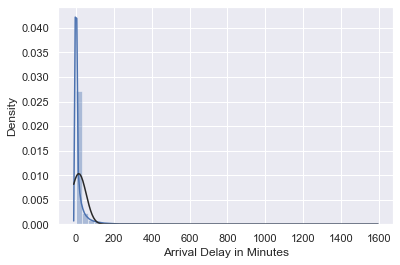

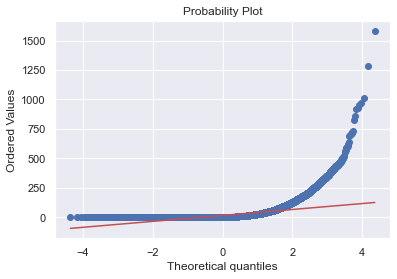

In [61]:
#ORIGINAL
sns.distplot(df_train['Arrival Delay in Minutes'], fit=norm);
fig = plt.figure()
res =stats.probplot(df_train['Arrival Delay in Minutes'], plot= plt)

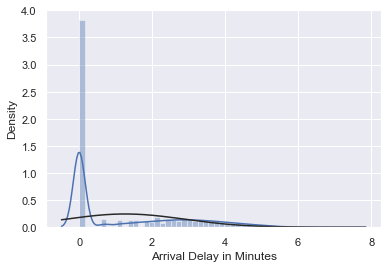

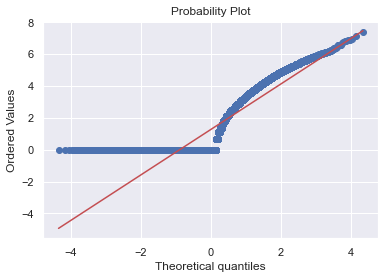

In [62]:
#TRANSFORMATION
#Note: Applying a log transform here to all the zero values will give us a bunch of -inf results which we dont want
#We will add a 0+n/2 term to the zero values where n is the smallest occurence.

df_train['Arrival Delay in Minutes'] = df_train['Arrival Delay in Minutes'] + 1
df_train['Arrival Delay in Minutes'] = np.log(df_train['Arrival Delay in Minutes'])

#Plot after Transformation
sns.distplot(df_train['Arrival Delay in Minutes'], fit=norm);
fig = plt.figure()
res =stats.probplot(df_train['Arrival Delay in Minutes'], plot= plt)

##### Arrival Delay - Test Set

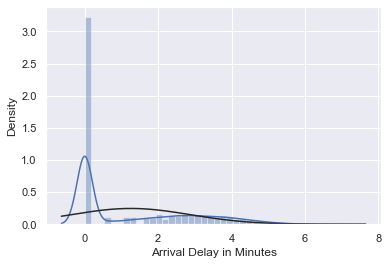

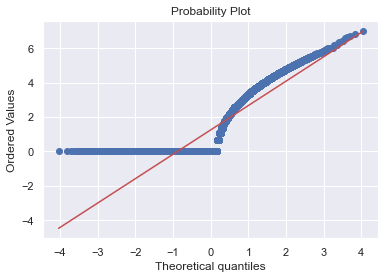

In [63]:
#TRANSFORMATION
df_test['Arrival Delay in Minutes'] = df_test['Arrival Delay in Minutes'] + 1
df_test['Arrival Delay in Minutes'] = np.log(df_test['Arrival Delay in Minutes'])

#Plot after Transformation
sns.distplot(df_test['Arrival Delay in Minutes'], fit=norm);
fig = plt.figure()
res =stats.probplot(df_test['Arrival Delay in Minutes'], plot= plt)

##### Departure Delay - Training Set

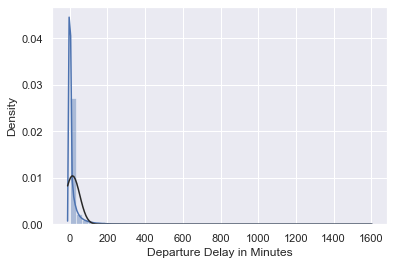

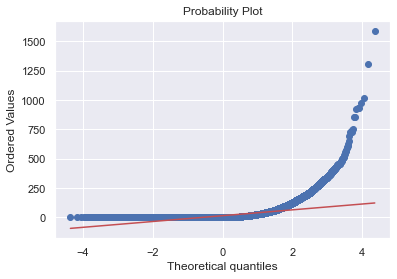

In [64]:
#ORIGINAL
sns.distplot(df_train['Departure Delay in Minutes'], fit=norm);
fig = plt.figure()
res =stats.probplot(df_train['Departure Delay in Minutes'], plot= plt)

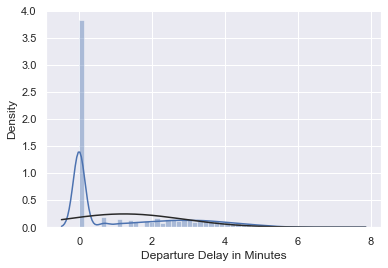

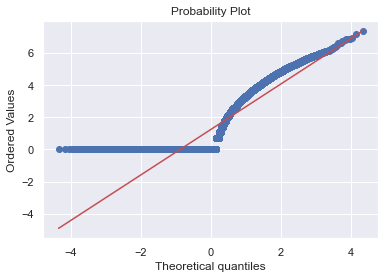

In [65]:
#TRANSFORMATION
df_train['Departure Delay in Minutes'] = df_train['Departure Delay in Minutes'] + 1
df_train['Departure Delay in Minutes'] = np.log(df_train['Departure Delay in Minutes'])

#Plot after Transformation
sns.distplot(df_train['Departure Delay in Minutes'], fit=norm);
fig = plt.figure()
res =stats.probplot(df_train['Departure Delay in Minutes'], plot= plt)

##### Departure Delay - Test Set

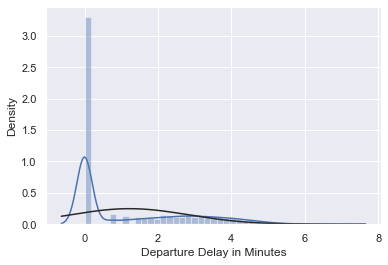

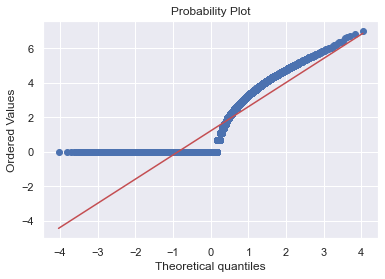

In [66]:
#TRANSFORMATION
df_test['Departure Delay in Minutes'] = df_test['Departure Delay in Minutes'] + 1
df_test['Departure Delay in Minutes'] = np.log(df_test['Departure Delay in Minutes'])

#Plot after Transformation
sns.distplot(df_test['Departure Delay in Minutes'], fit=norm);
fig = plt.figure()
res =stats.probplot(df_test['Departure Delay in Minutes'], plot= plt)

#### 2: Flight Distance

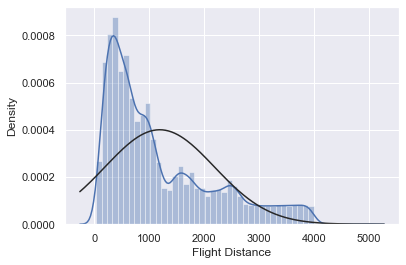

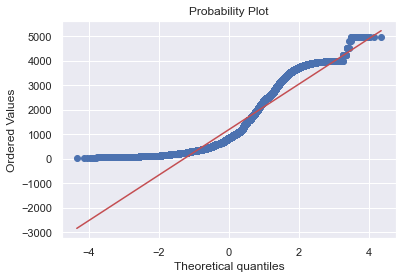

In [67]:
sns.distplot(df_train['Flight Distance'], fit=norm);
fig = plt.figure()
res =stats.probplot(df_train['Flight Distance'], plot= plt)

In [68]:
print("Skewness(Flight Distance-Training Set): %f" %df_train['Flight Distance'].skew())
print("Kurtosis(Flight Distance-Training Set): %f\n" %df_train['Flight Distance'].kurt())

Skewness(Flight Distance-Training Set): 1.109466
Kurtosis(Flight Distance-Training Set): 0.268535



This distribution is slighlty skewed, we will leave it as it is for now

#### 3: Age
Even though looking at the stripplots you could say the satisfaction ratings of 40-60 age group can be contributed to the reason the satisfied were the ones travelling in Buisness class, we can still create a new feature by age brackets of 0-20 ,20-40 and such. The association matrix shows that there is only a very minor association in between these two features.

In [69]:
_ = df_train['Age']
for i,feature in enumerate(df_train['Age']):
    if feature >= 0 and feature <= 14:
        df_train['Age'][i] = 'child'
    elif feature > 14 and feature <= 24:
        df_train['Age'][i] = 'youth'
    elif feature > 24 and feature <= 60:
        df_train['Age'][i] = 'adult'
    else:
        df_train['Age'][i] = 'senior'

In [70]:
_ = df_test['Age']
for i,feature in enumerate(df_test['Age']):
    if feature >= 0 and feature <= 14:
        df_test['Age'][i] = 'child'
    elif feature > 14 and feature <= 24:
        df_test['Age'][i] = 'youth'
    elif feature > 24 and feature <= 60:
        df_test['Age'][i] = 'adult'
    else:
        df_test['Age'][i] = 'senior'

In [71]:
df_train['Age'].value_counts()

adult     76113
youth     14585
senior     7976
child      5230
Name: Age, dtype: int64

<AxesSubplot:xlabel='Age', ylabel='count'>

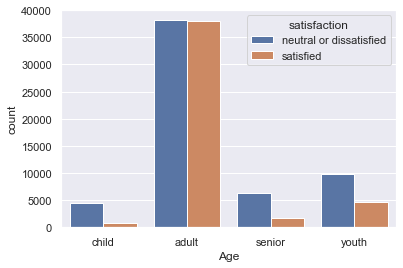

In [72]:
sns.countplot(x='Age',data=df_train,hue='satisfaction')

#### Categorical Feature Encoding

In this secion we will encode the catgeorical features, the features Gender, Customer Type , Age and Type of travel are considered under the nominal category and Class under Ordinal. I had stated earlier that Type of travel was related to Class and we also were thinking of combining the two features but as I did not go ahead with that and the fact that Type of travel seems very nominal in nature we will encode it along with the nominal features.

In [73]:
nominal = ['Gender','Customer Type','Age','Type of Travel']
ordinal = ['Class']

##### Nominal Encoding
We will use One Hot Encoder for this encoding, we could have also used pd.get_dummies for this. We will get indiviudal columns for all our categories after the encoding. Please note to transform the test set and not fit transform.

In [74]:
OH = OneHotEncoder(handle_unknown='ignore',sparse = False)
OH_col_train = pd.DataFrame(OH.fit_transform(df_train[nominal]))
OH_col_test = pd.DataFrame(OH.transform(df_test[nominal]))

#Reassigining feature names
OH_col_train.columns = OH.get_feature_names_out(input_features= df_train[nominal].columns) 
OH_col_test.columns = OH.get_feature_names_out(input_features= df_test[nominal].columns) 


#OH transformed columns need to be assigned index 
OH_col_train.index = df_train.index
OH_col_test.index = df_test.index

num_X_train = df_train.drop(nominal,axis=1)
num_X_test = df_test.drop(nominal,axis=1)

df_train = pd.concat([num_X_train,OH_col_train],axis =1)
df_test = pd.concat([num_X_test,OH_col_test],axis=1)

##### Ordinal Encoding
We can use a Ordinal Encoder class here but as Ordinal Encoder takes atleast a 2D array as input and we would have had to specify the order anyway we can use the map function as an easier method.

In [75]:
df_train['Class'].value_counts()

Business    49665
Eco         46745
Eco Plus     7494
Name: Class, dtype: int64

In [76]:
temp_dict = {'Business':1,'Eco':3,'Eco Plus':2}

In [77]:
df_train['Class'] = df_train['Class'].map(temp_dict)

In [78]:
df_test['Class'] = df_test['Class'].map(temp_dict)
df_test['Class'].value_counts()

1    12495
3    11564
2     1917
Name: Class, dtype: int64

We have already dealt with the continous features, we can also remove the extra features we have

In [79]:
df_train.drop(['id','Unnamed: 0'],axis=1,inplace=True)
df_test.drop(['id','Unnamed: 0'],axis=1,inplace=True)

#### Encode the target column for classification

In [80]:
df_train['satisfaction'].value_counts()

neutral or dissatisfied    58879
satisfied                  45025
Name: satisfaction, dtype: int64

In [81]:
df_train.satisfaction = df_train.satisfaction.map({'neutral or dissatisfied':0,'satisfied':1})
df_test.satisfaction = df_test.satisfaction.map({'neutral or dissatisfied':0,'satisfied':1})

### Model Testing
We will define two functions here for two different models: RandomForestClassifier and XGBClassifier. The functions will allow us to create model instances and pass a number of model paramaters and compare which parameters perform better like tree depth and n_estimators.

Evaluation Metric: We will be using AUC as our evaluation metric for our models.

The ROC-AUC scores can be judged as follows:

    .90-1 = Excellent
    .80-.90 = Good
    .70-.80 = Fair
    .60-.70 = Poor
    .50-.60 = Fail

In [82]:
def xgb_model(n,tree,rate,X,y,X_test,y_test):
    XGB=XGBClassifier(n_estimators=n,max_depth=tree,learning_rate=rate,n_jobs=4,random_state=0,eval_metric='error',objective='binary:hinge')
    XGB.fit(X,y)
    predictions = XGB.predict(X_test)
    print(f"Area Under Curve Score on XGB: {roc_auc_score(y_test,predictions)} for n_estimators:{n},tree_depth:{tree} and learning rate:{rate}")

Speicfic parameters for eval_metric and objective are specified for binary classification.

In [83]:
def rfr_model(n,tree,X,y,X_test,y_test):
    RFR = RandomForestClassifier(n_estimators=n,max_depth=tree,n_jobs=4,random_state=0)
    RFR.fit(X,y)
    predictions = RFR.predict(X_test)
    print(f"Area Under Curve Score on RFR: {roc_auc_score(y_test,predictions)} for n_estimators:{n} and tree_depth:{tree}")

In [84]:
#Calling for XGB function on dataset
X = df_train.drop('satisfaction',axis=1)
y = df_train.satisfaction
X_test = df_test.drop('satisfaction',axis=1)
y_test = df_test.satisfaction

# you can add parameters in the list to see how the model performs on various inputs
#I have filtered out the original lists after some testing
estimator_list = [150,200,300]
tree_list = [10]
learning_rate_list = [0.1]

for i1 in estimator_list:
    for i2 in tree_list:
        for i3 in learning_rate_list:
            xgb_model(i1,i2,i3,X,y,X_test,y_test)

Area Under Curve Score on XGB: 0.9614995479579684 for n_estimators:150,tree_depth:10 and learning rate:0.1
Area Under Curve Score on XGB: 0.9615281622122397 for n_estimators:200,tree_depth:10 and learning rate:0.1
Area Under Curve Score on XGB: 0.9611716815599497 for n_estimators:300,tree_depth:10 and learning rate:0.1


##### We have our best score of AUC: 0.96 for XGBClassifier 

In [85]:
#Calling for RFR function on dataset
estimator_list = [100,150,200]
tree_list = [5,10]

for i1 in estimator_list:
    for i2 in tree_list:
        rfr_model(i1,i2,X,y,X_test,y_test)

Area Under Curve Score on RFR: 0.921824100157376 for n_estimators:100 and tree_depth:5
Area Under Curve Score on RFR: 0.9480091998167316 for n_estimators:100 and tree_depth:10
Area Under Curve Score on RFR: 0.9207737343700202 for n_estimators:150 and tree_depth:5
Area Under Curve Score on RFR: 0.9478928893421676 for n_estimators:150 and tree_depth:10
Area Under Curve Score on RFR: 0.9189587391419812 for n_estimators:200 and tree_depth:5
Area Under Curve Score on RFR: 0.9479519713081893 for n_estimators:200 and tree_depth:10


##### We have our best score of AUC: 0.94 for RandomForestClassifier

### Feature Importance

The fitted models can give us metrics which define how usefull certain features were for their predictions. These scores ultimately can be compared to our EDA to see if our observations were correct and also used to remove features which are not contributing to the model and remove the bias if we want.

Importance Matrix from XGB will provide 'importance values' for different metrics. 

Gain : Implies the relative contribution of a feature for each tree, a higher value than a 2nd feature shows its more imp for generating a prediction. This is the most relevant attribute to interpret the relative importance of each feature.

Coverage: Means the relative number of observations related to this feature. Number of times a feature is used  for splits described as a percentage out of all feature's cover metrics.

Weight: Percentage representing the relative number of times a feature occurs in the trees of a model.

In [86]:
XGB=XGBClassifier(n_estimators=150,max_depth=10,learning_rate=0.1,n_jobs=4,random_state=0,eval_metric='error',objective='binary:hinge')
XGB.fit(X,y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='error', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=10, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=150, n_jobs=4,
              num_parallel_tree=1, objective='binary:hinge', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

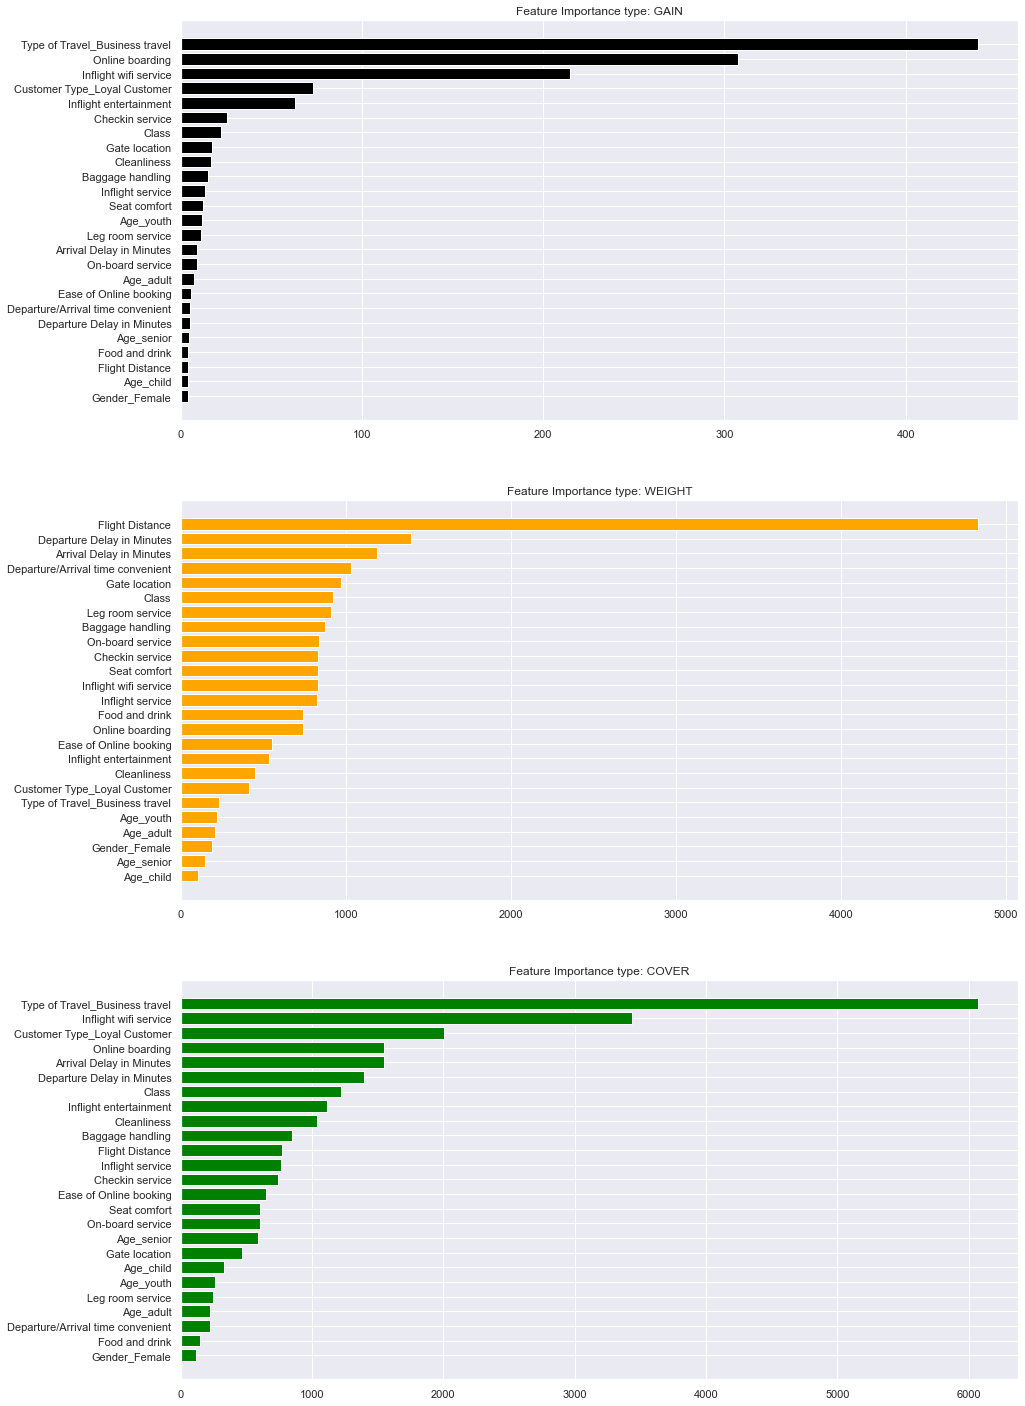

In [87]:
#Importance Matrix 

fig,ax = plt.subplots(ncols=3,nrows=1,figsize=(15,25))
ls1 = ['gain','weight','cover']
color_ls=['black','orange','green']
for i,f in enumerate (ls1):
    plt.subplot(3,1,i+1)
    #Feature Scores
    dict1 = XGB.get_booster().get_score(importance_type=f)
    
    #Converting the dictonary to dataframe and sorting
    df = pd.DataFrame.from_dict(dict1,orient = 'index',columns=['val_1'] )
    df = df.sort_values(axis=0,by=['val_1'])
    
    #Barh Plot
    plt.barh(list(df.index),df.val_1,color = color_ls[i])
    plt.title(f"Feature Importance type: {f.upper()}")   
plt.show()
#Note: we get a dict from get_booster.get_score , transform to a dataframe so the values can be sorted

### Final Observations for the Dataset
1. **Overall the dataset features are very informative and we were able to achieve good AUC scores 0f 0.94-0.96 on our test data set.**
2. **Buisness Travel has the highest scores for feature importance followed by Online Boarding, Wifi and Loyal Customers. Our EDA had also these described these features as good predictiors except for Loyal Customers so that feature we missed out on but the model has it highly rated.**
2. **Features like Class, Wifi, Online-Boarding, Inflight Entertainment , Type of Travel had the most association and prediction value for our target.**
3. **Majority of people flying Buisness Class are satisfied and its the opposite for Eco class.**
4. **Features which describe the overall services offered inside the flight and outside like online boarding, wifi, leg room also play a role in determining satisfaction.**
5. **The airline can improve its satisfaction ratings by concentraing on improving the Eco class servives which are majorly neutral/dissatisfied.**